In [1]:
import numpy as np
import pandas as pd
import json
from functions import classify_intent
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
def string_to_list(json_str):
    return json.loads(json_str)

In [ ]:
qa=pd.read_csv("QAv2.csv",header=1)
# qa["Expected_Role"]=qa["Expected Role"].apply(string_to_list)

In [ ]:
qa.head()

,Objective,Question,Expected Role,Expected Solution,Actual Question
0,without lecture hint,What’s the Internet: “nuts and bolts” view?,"[""Asking for Clarifying Concepts or Topics"",""A...","The Internet operates as a complex ""network of...",NaN
1,with lecture hint,What’s the Internet: “nuts and bolts” view in ...,"[""Asking for Clarifying Concepts or Topics"",""A...","The Internet operates as a complex ""network of...",NaN
2,without lecture hint,What’s the Internet: a service view?,"[""Asking for Clarifying Concepts or Topics"",""A...","From a service perspective, the Internet funct...",NaN
3,with lecture hint,What’s the Internet: a service view in the lec...,"[""Asking for Clarifying Concepts or Topics"",""A...","From a service perspective, the Internet funct...",NaN
4,with lecture hint,Can you elaborate about Network-core: Circuit ...,"[""Asking for Clarifying Concepts or Topics"",""A...",Circuit switching is a network core method whe...,NaN


In [ ]:
# !pip install langchain
# !pip install langchain-community

## models that we are going to use: llama3.1, phi3, mistral-large, llama3, llama2, gemma2

In [ ]:
# !ollama pull llama2
# !ollama pull phi3


In [ ]:
def classify_intent(query,llm):
    """
    Use the LLM to classify the intent of the query.
    """
    prompt = intent_classification+ "\n"+"Question: "+query 
    intents = [
        "Answering Questions on Lecture Slides",
        "Providing Homework Guidance",
        "Asking for Clarifying Concepts or Topics",
        "Answering Questions about Syllabus",
        "Homework Question Clarification",
        "Reply to previous conversation"
    ]
    response = llm(prompt, max_tokens=1024)
    distances = [
        textdistance.levenshtein(response.lower(), INTENT.lower()) for INTENT in intents
    ]
    # Find the index of the smallest distance (most similar)
    closest_intent_index = distances.index(min(distances))
    closest_intent = intents[closest_intent_index]
    return closest_intent,response.lower()


In [ ]:
from langchain_community.llms import Ollama
from prompt_template import *
import textdistance

model_names=["llama3.1","llama3","llama2","gemma2","phi3"]

for each_model in model_names:
    llm=Ollama(model=each_model,temperature=0)
    question_list=list(qa.Question.values)
    model_intent=[]
    for enum,each_question in enumerate(question_list):
        print(each_model,enum)
        intent,_=classify_intent(each_question,llm)
        model_intent.append(intent)
    qa[each_model.replace(".","")]=model_intent 

llama3.1 0


/var/folders/hk/rt1vv1js1rv6pltm70r0s66w0000gn/T/ipykernel_5712/3963998076.py:14: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use invoke instead.
  response = llm(prompt, max_tokens=1024)


KeyboardInterrupt: 

In [ ]:
qa.to_csv('qa_llm_rolev2.csv', index=False) # for llama3.1,llama3,llama2,gemma2,phi3


In [ ]:
import pandas as pd
import numpy as np
qa=pd.read_csv('qa_llm_rolev2.csv')

In [ ]:
len(qa)

115

In [ ]:
expected_role=list(qa.Expected_Role.values)
binary_llama31=[1 if i in expected_role[enum] else 0  for enum,i in enumerate(list(qa.llama31.values))]
binary_llama3=[1 if i in expected_role[enum] else 0  for enum,i in enumerate(list(qa.llama3.values))]
binary_llama2=[1 if i in expected_role[enum] else 0  for enum,i in enumerate(list(qa.llama2.values))]
binary_gemma2=[1 if i in expected_role[enum] else 0  for enum,i in enumerate(list(qa.gemma2.values))]
binary_phi3=[1 if i in expected_role[enum] else 0  for enum,i in enumerate(list(qa.phi3.values))]


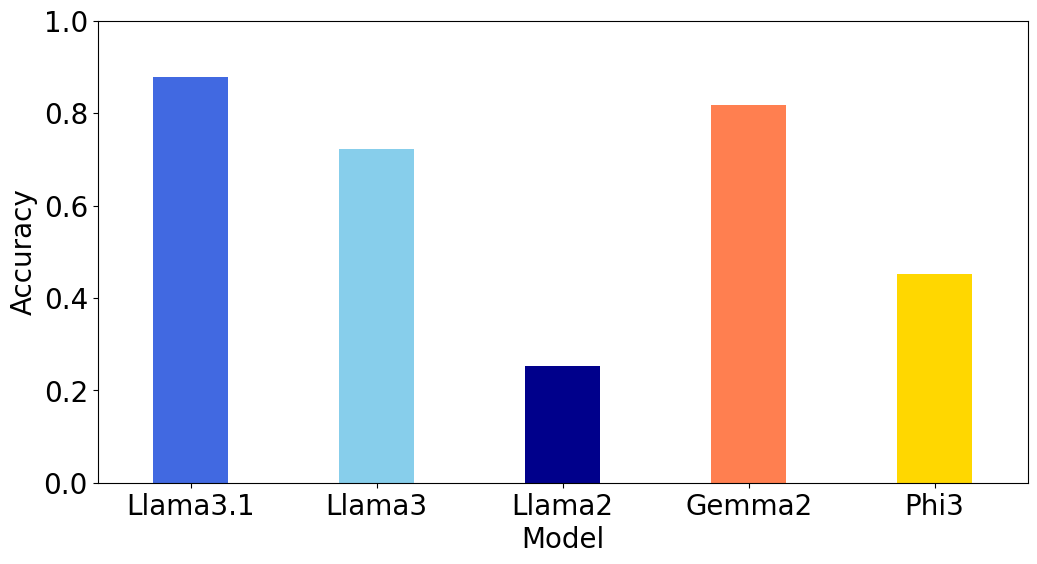

In [ ]:
import matplotlib.image as mpimg
from PIL import Image

import matplotlib.pyplot as plt
# Define function to calculate accuracy
def calculate_accuracy(predictions, true_labels):
    return np.mean(np.array(predictions) == np.array(true_labels))

# Example calculations
accuracy_llama31 = calculate_accuracy(binary_llama31, [1 for i in range(len(binary_llama31))])
accuracy_llama3 = calculate_accuracy(binary_llama3, [1 for i in range(len(binary_llama31))])
accuracy_llama2 = calculate_accuracy(binary_llama2, [1 for i in range(len(binary_llama31))])
accuracy_gemma2 = calculate_accuracy(binary_gemma2, [1 for i in range(len(binary_llama31))])
accuracy_phi3 = calculate_accuracy(binary_phi3, [1 for i in range(len(binary_llama31))])


# Accuracy data
accuracies = [accuracy_llama31, accuracy_llama3, accuracy_llama2, accuracy_gemma2, accuracy_phi3]
model_names = ['Llama3.1', 'Llama3', 'Llama2', 'Gemma2', 'Phi3']

# Load and plot logos
logo_paths = ['LLMS/llama3.1.jpg', 
              'LLMS/llama3.jpg', 
              'LLMS/llama2.jpg', 
              'LLMS/Gemma2.jpg', 
              'LLMS/Phi3.jpg']

# Plot accuracy
plt.figure(figsize=(12, 6))
colors = ['#4169E1', '#87CEEB', 'darkblue', '#FF7F50', '#FFD700']

bars = plt.bar(model_names, accuracies, color=colors,width=0.4)
plt.xlabel('Model',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
# plt.title('Accuracy of LLMs for Role/Intent Classification',fontsize=20)

# Add logos above the bars
for enum, logo_path in enumerate(logo_paths):
    image = mpimg.imread(logo_path) 
    # Calculate the position to place the logo
    # x = enum # Center the logo
    # y = accuracies[enum]+0.05
    # extent=(x-0.25,x+0.25,y,y+0.2)

    # Plot the image with adjusted extent
    # plt.imshow(image, extent=extent,aspect='auto')  # x from 5 to 6, y from 5 to 6

plt.ylim(0, 1)
plt.xlim(-0.5,4.5)
plt.xticks(fontsize=20)  
plt.yticks(fontsize=20) 
# Save the figure to a file
plt.savefig("Figures/llm_role_accuracies2.png")
plt.show()


## Analyze which intent the model failed to analyze:
We have chosen llama3.1 and gemma2 for our further analysis

In [ ]:
index_fail_llama31=[enum for enum,i in enumerate(binary_llama31) if i==0]
index_fail_gemma2=[enum for enum,i in enumerate(binary_gemma2) if i==0]
expectedrole_gemma2=[i for enum,i in enumerate(list(qa.gemma2.values)) if enum in index_fail_gemma2 ]
expectedobj_gemma2=[i for enum,i in enumerate(list(qa.Objective.values)) if enum in index_fail_gemma2  ]
expectedobj_gemma2 = [i for i in expectedobj_gemma2 if isinstance(i, str)]


expectedrole_llama31=[i for enum,i in enumerate(list(qa.llama31.values)) if enum in index_fail_llama31 ]
expectedobj_llama31=[i for enum,i in enumerate(list(qa.Objective.values)) if enum in index_fail_llama31 ]
expectedobj_llama31 = [i for i in expectedobj_llama31 if isinstance(i, str)]



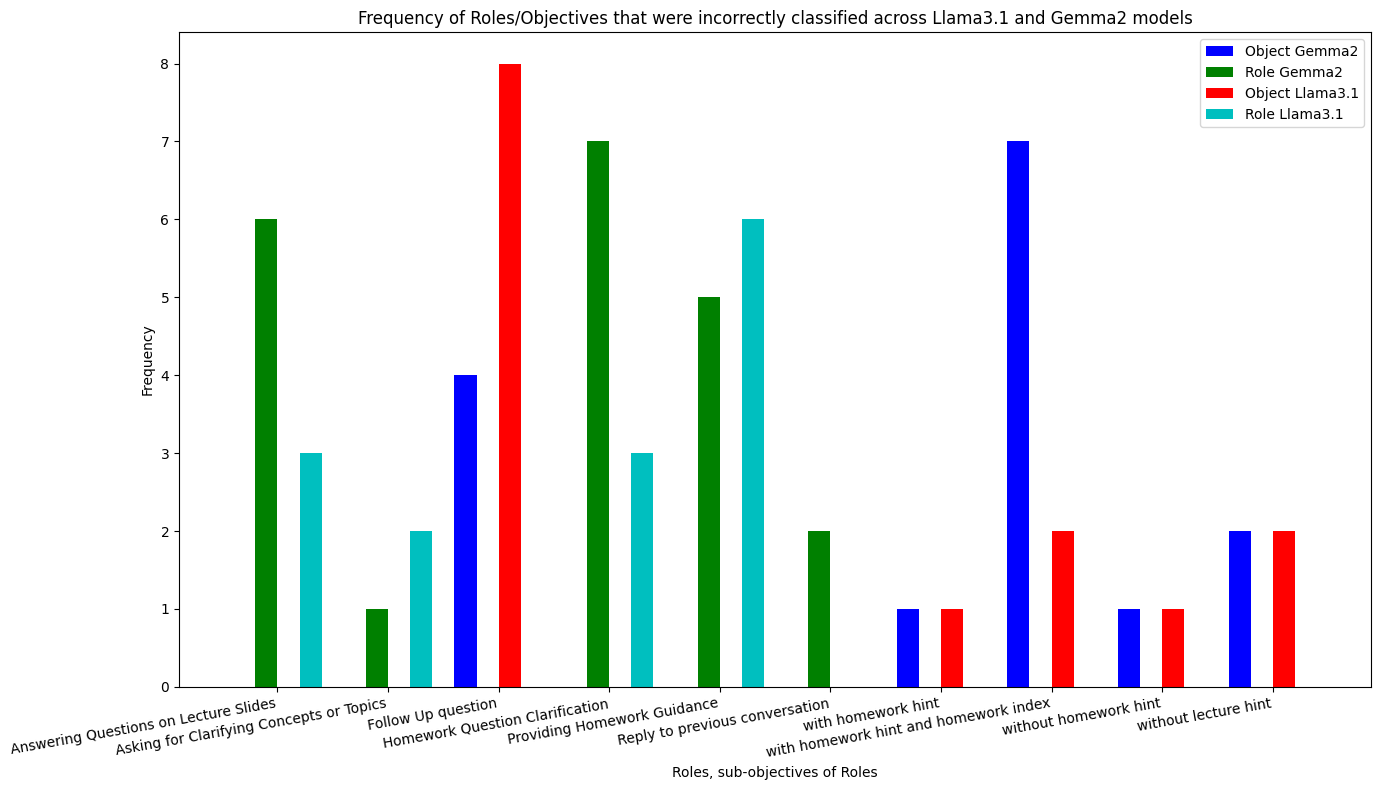

In [ ]:
from collections import Counter
# Count the occurrences of each string
counts_obj_gemma2 = Counter(expectedobj_gemma2)
counts_role_gemma2 = Counter(expectedrole_gemma2)


counts_obj_llama31 = Counter(expectedobj_llama31)
counts_role_llama31 = Counter(expectedrole_llama31)

# Extract data from counts_obj_gemma2
labels_obj_gemma2, values_obj_gemma2 = zip(*counts_obj_gemma2.items())

# Extract data from counts_role_gemma2
labels_role_gemma2, values_role_gemma2 = zip(*counts_role_gemma2.items())

# Extract data from counts_obj_llama31
labels_obj_llama31, values_obj_llama31 = zip(*counts_obj_llama31.items())

# Extract data from counts_role_llama31
labels_role_llama31, values_role_llama31 = zip(*counts_role_llama31.items())

# Get all unique labels from all datasets
all_labels = set(counts_obj_gemma2.keys()).union(
    counts_role_gemma2.keys(),
    counts_obj_llama31.keys(),
    counts_role_llama31.keys()
)


# Sort labels for consistent ordering
all_labels = sorted(all_labels)

# Create frequency lists for each dataset
freq_obj_gemma2 = [counts_obj_gemma2.get(label, 0) for label in all_labels]
freq_role_gemma2 = [counts_role_gemma2.get(label, 0) for label in all_labels]
freq_obj_llama31 = [counts_obj_llama31.get(label, 0) for label in all_labels]
freq_role_llama31 = [counts_role_llama31.get(label, 0) for label in all_labels]

# Define the x-axis positions
x = np.arange(len(all_labels))
width = 0.2  # Width of the bars

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each dataset
plt.bar(x - 1.5*width, freq_obj_gemma2, width, label='Object Gemma2', color='b')
plt.bar(x - 0.5*width, freq_role_gemma2, width, label='Role Gemma2', color='g')
plt.bar(x + 0.5*width, freq_obj_llama31, width, label='Object Llama3.1', color='r')
plt.bar(x + 1.5*width, freq_role_llama31, width, label='Role Llama3.1', color='c')

# Add labels and title
plt.xlabel('Roles, sub-objectives of Roles')
plt.ylabel('Frequency')
plt.title('Frequency of Roles/Objectives that were incorrectly classified across Llama3.1 and Gemma2 models')
plt.xticks(x, all_labels, rotation=10, ha='right')

# Add a legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1174: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

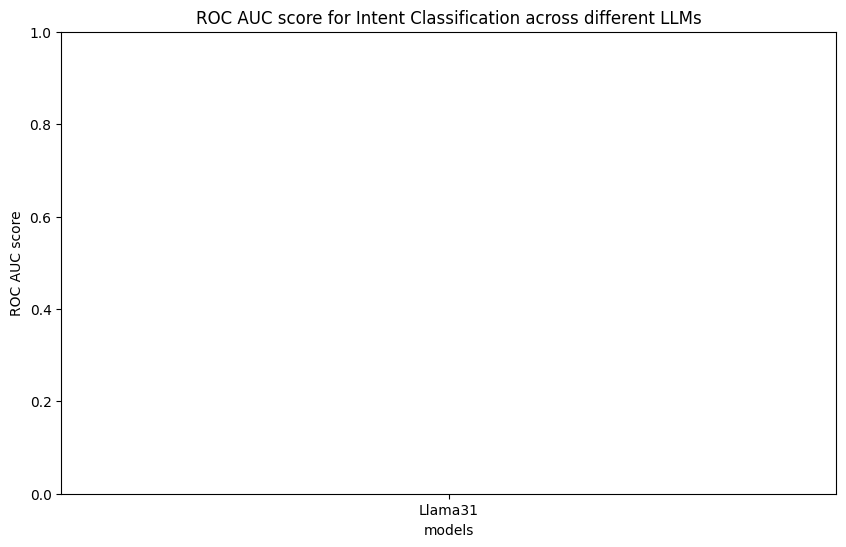

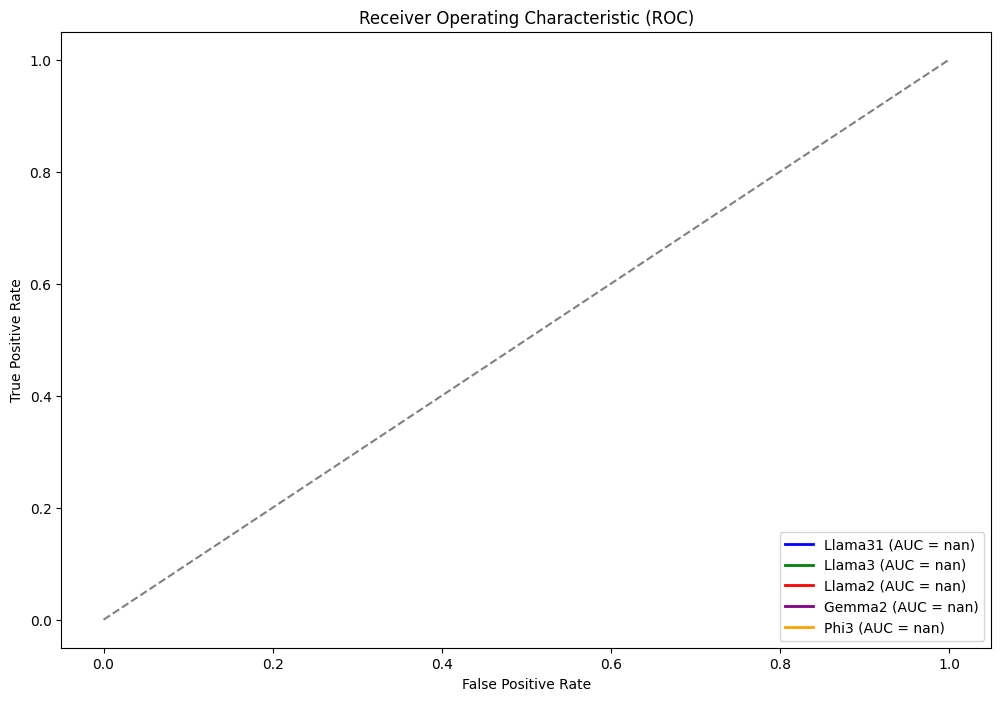

In [ ]:
from sklearn.metrics import roc_curve, auc
true=[1 for i in range(len(binary_llama31))]
# Calculate ROC curve
fpr_llama31, tpr_llama31, _ = roc_curve(true, binary_llama31)
fpr_llama3, tpr_llama3, _ = roc_curve(true, binary_llama3)
fpr_llama2, tpr_llama2, _ = roc_curve(true, binary_llama2)
fpr_gemma2, tpr_gemma2, _ = roc_curve(true, binary_gemma2)
fpr_phi3, tpr_phi3, _ = roc_curve(true, binary_phi3)

# Calculate AUC
roc_auc_llama31 = auc(fpr_llama31, tpr_llama31)
roc_auc_llama3 = auc(fpr_llama3, tpr_llama3)
roc_auc_llama2 = auc(fpr_llama2, tpr_llama2)
roc_auc_gemma2 = auc(fpr_gemma2, tpr_gemma2)
roc_auc_phi3 = auc(fpr_phi3, tpr_phi3)
# Plot accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_names, [roc_auc_llama31,roc_auc_llama3,roc_auc_llama2,roc_auc_gemma2,roc_auc_phi3], color='skyblue')
plt.xlabel('models')
plt.ylabel('ROC AUC score')
plt.title('ROC AUC score for Intent Classification across different LLMs')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(12, 8))

# Plot ROC curve for each model
plt.plot(fpr_llama31, tpr_llama31, color='blue', lw=2, label=f'Llama31 (AUC = {roc_auc_llama31:.2f})')
plt.plot(fpr_llama3, tpr_llama3, color='green', lw=2, label=f'Llama3 (AUC = {roc_auc_llama3:.2f})')
plt.plot(fpr_llama2, tpr_llama2, color='red', lw=2, label=f'Llama2 (AUC = {roc_auc_llama2:.2f})')
plt.plot(fpr_gemma2, tpr_gemma2, color='purple', lw=2, label=f'Gemma2 (AUC = {roc_auc_gemma2:.2f})')
plt.plot(fpr_phi3, tpr_phi3, color='orange', lw=2, label=f'Phi3 (AUC = {roc_auc_phi3:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()